In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import statistics
%matplotlib inline

In [2]:
df = pd.read_csv('HR.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# Рассчитать основные статистики для переменных

**Среднее**

In [11]:
df.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

**Медиана**

In [7]:
df.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

**Мода**

In [12]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


**Минимум и максимум**

In [8]:
df.min()

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
sales                      IT
salary                   high
dtype: object

In [9]:
df.max()

satisfaction_level               1
last_evaluation                  1
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
sales                    technical
salary                      medium
dtype: object

**Стандартное отклонение**

In [13]:
df.std()

satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
Work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
dtype: float64

# Рассчитать и визуализировать корреляционную матрицу для переменных

Перед расчётом матрицы корреляций заменим значения в колонке salary со строковых на числовые.

In [24]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [8]:
df1 = df.replace(['low', 'medium', 'high'], [1, 2, 3])

In [37]:
df1.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


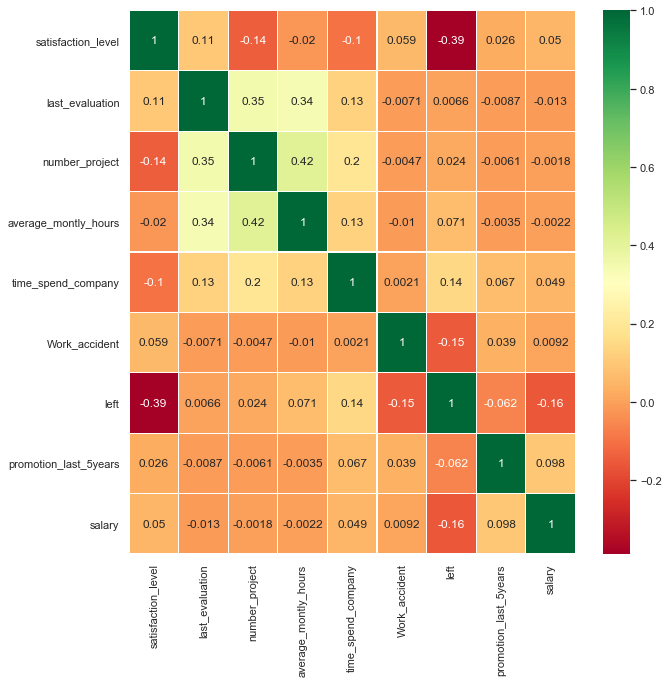

In [55]:
sns.heatmap(df1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10, 10)

# Визуализировать несколько взаимосвязей между переменными

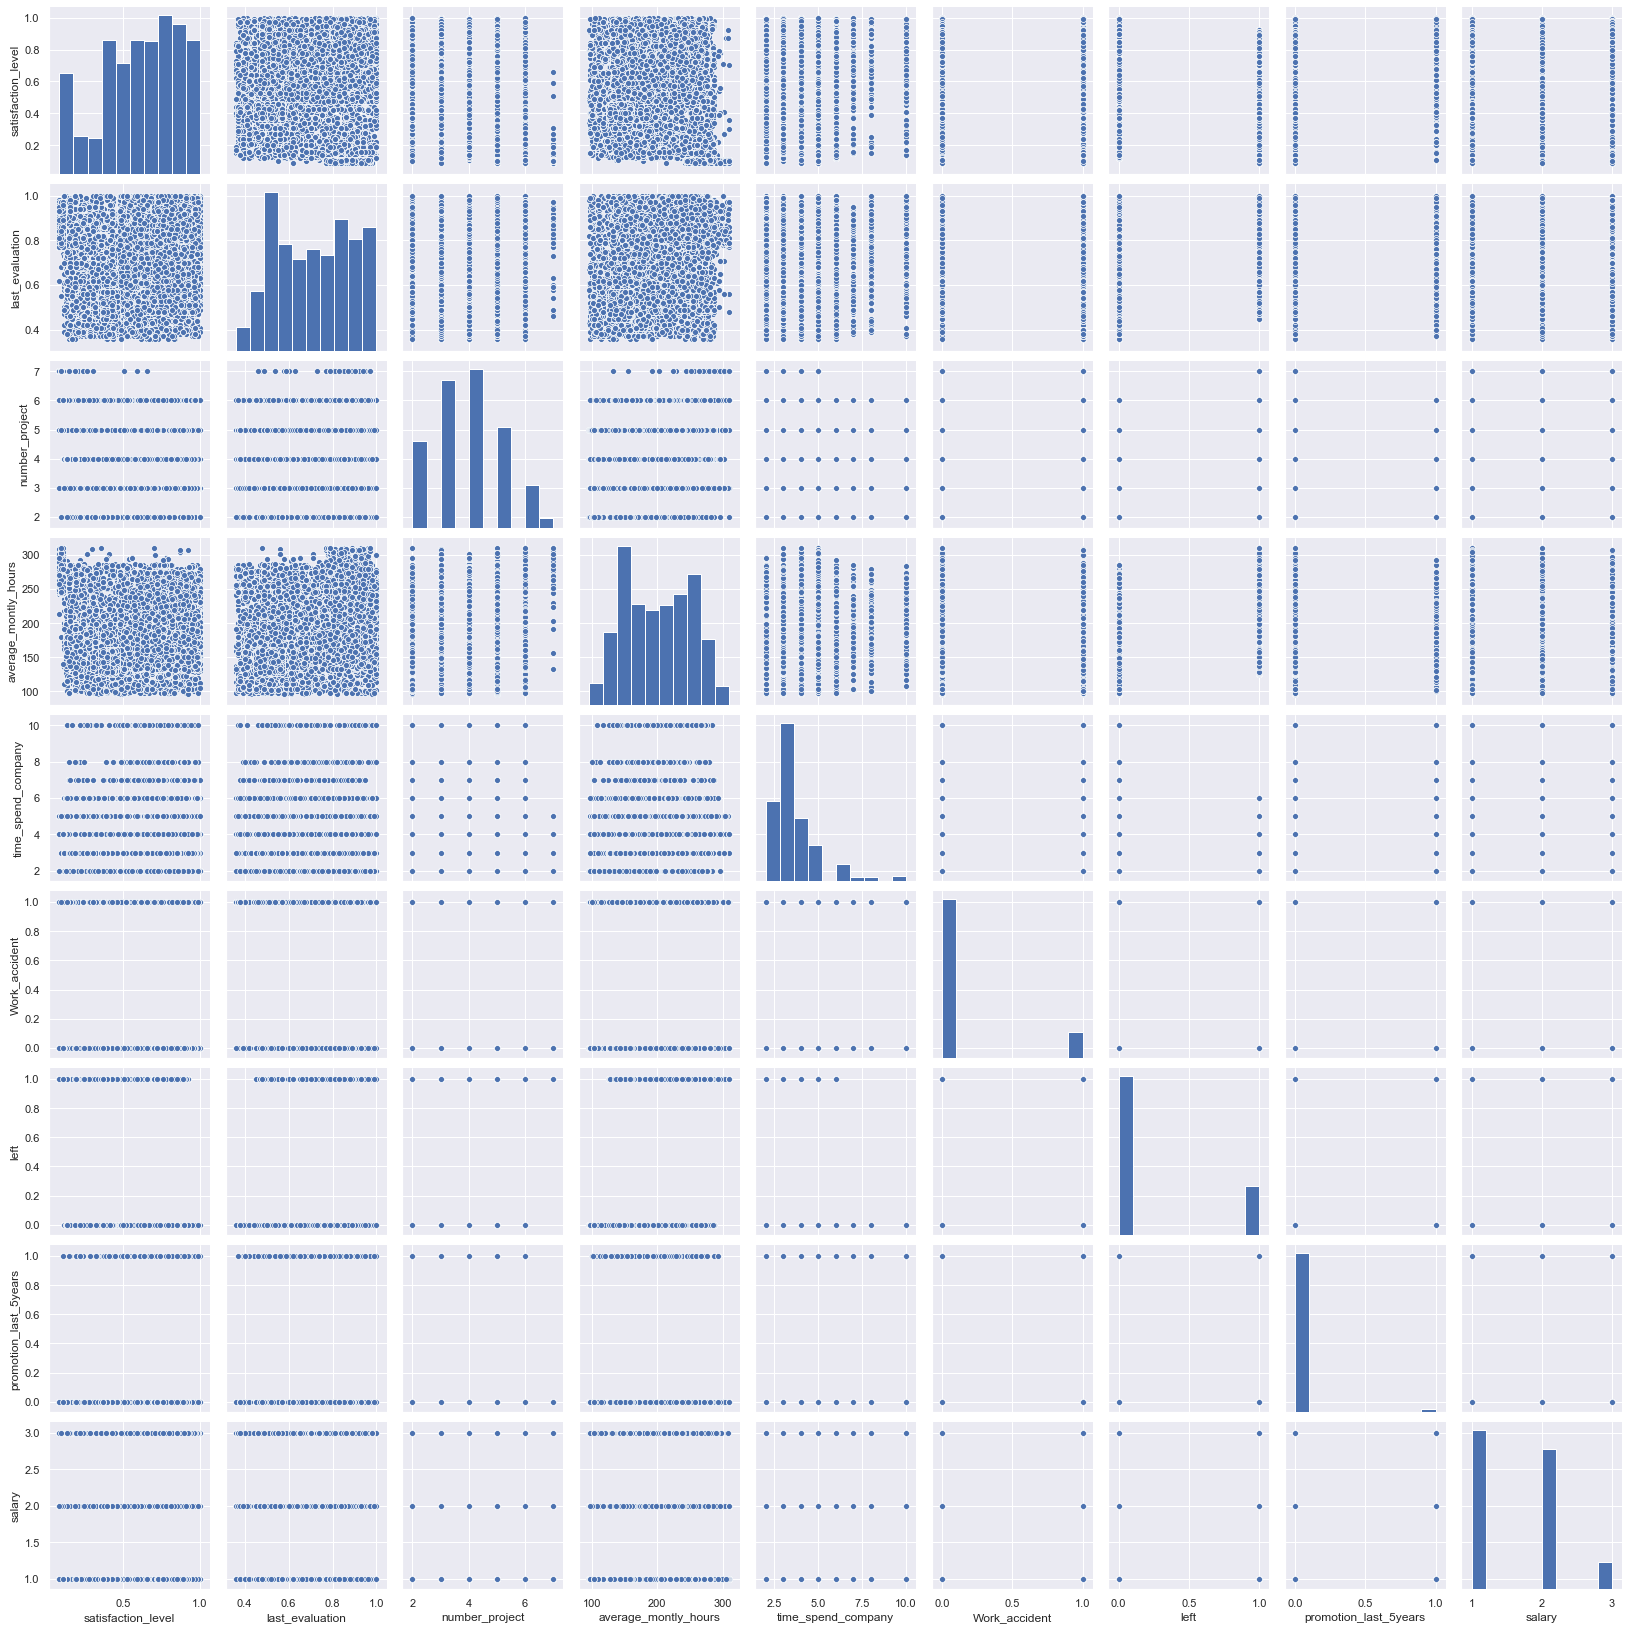

In [43]:
sns.pairplot(df1, kind='scatter')

# С использованием t-test статистики проверить взаимосвязи между несколькими переменными

Логично, что возможно наличие взаимосвязи между:
- уровнем зарплаты и уровнем удовлетворенности,
- уровнем зарплаты и стажем в компании,
- уровнем зарплаты и средним количеством часов в месяц,
- уровнем удовлетворенности и стажем в компании.

Однако, в матрице корреляций такой взаимосвязи не видно. Как и вообще каких-либо существенных корреляций. Более менее заметная корреляция есть между уровнем удовлетворенности и увольнением; количеством проектом и средним количеством рабочих часов в месяц. 

Проверим взаимосвязи между перечисленными параметрами.

In [11]:
from scipy import stats

In [12]:
stats.ttest_ind(df1.salary, df1.satisfaction_level)

Ttest_indResult(statistic=175.8115102805405, pvalue=0.0)

In [14]:
stats.ttest_ind(df1.salary, df1.time_spend_company)

Ttest_indResult(statistic=-146.33370517324587, pvalue=0.0)

In [15]:
stats.ttest_ind(df1.salary, df1.average_montly_hours)

Ttest_indResult(statistic=-489.0650412411013, pvalue=0.0)

In [16]:
stats.ttest_ind(df1.satisfaction_level, df1.time_spend_company)

Ttest_indResult(statistic=-238.58170166684755, pvalue=0.0)

Во всех тестах p-value < 0.05. Имеется статистическое различие между атрибутами, взаимосвязи между параметрами согласно t-тестированию нет.

# Рассчитать сколько работников работает в каждом департаменте

In [23]:
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

# Показать распределение сотрудников по зарплатам

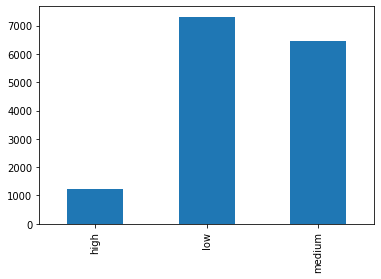

In [3]:
df['salary'].value_counts().sort_index().plot.bar()

# Показать распределение сотрудников по зарплатам совместно с департаментами

In [4]:
salary_list = df.groupby(['sales'])['salary'].agg(['value_counts']) 
salary_list

value_counts
sales       salary              
IT          low              609
            medium           535
            high              83
RandD       medium           372
            low              364
            high              51
accounting  low              358
            medium           335
            high              74
hr          medium           359
            low              335
            high              45
management  high             225
            medium           225
            low              180
marketing   low              402
            medium           376
            high              80
product_mng low              451
            medium           383
            high              68
sales       low             2099
            medium          1772
            high             269
support     low             1146
            medium           942
            high             141
technical   low             1372
            medium          1147
            high             201

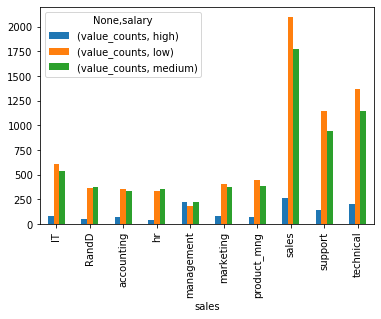

In [6]:
salary_list.unstack().plot(kind='bar')

# Сколько сотрудников покинули компанию

In [39]:
df['left'].value_counts() # ответ - количество значений 1

0    11428
1     3571
Name: left, dtype: int64

# Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

- Из-за низкой зарплаты
- Работают более 5 лет, а продвижения не было
- Большая месячная загрузка по проектам и низкая зарплата
- Сотрудники увольняются после несчастного случая (одного и более)

**Увольнения из-за низкой зарабатной платы**

Перед статистической проверкой хочу дополнительно сделать распредление уровня зарплат среди уволенных сотрудников: 

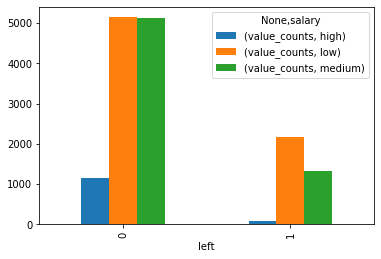

In [28]:
left_salary_list = df.groupby(['left'])['salary'].agg(['value_counts'])
left_salary_list.unstack().plot(kind='bar')

Из графика видно, что среди уволившихся сотрудников большинство получали низкую зарплату. Доля уволившихся с высокой зарплатой невелика. Это позволяет допустить, что низкая зарплата одна из весомых причин для увольнения среди сотрудников. Однако в графике слева, мы видим, что практически 5000 человек работает с низкой зарплатой. 

Из предварительной работы выше я предполагаю, что на увольнение влияет не один параметр, а совокупность факторов. Поэтому для более качественного анализа причин важнее определить, какое именно сочетание факторов (скольких факторов) чаще всего встречается среди увольнений. 

In [33]:
all_left = df1[df1['left']==1]

In [37]:
all_left.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
satisfaction_level,1.000000,0.182295,-0.227113,-0.084117,0.446440,0.005864,NaN,0.005516,-0.005837
last_evaluation,0.182295,1.000000,0.804155,0.830336,0.783873,-0.001875,NaN,-0.047992,-0.009612
number_project,-0.227113,0.804155,1.000000,0.875194,0.601989,-0.008401,NaN,-0.032301,0.002581
average_montly_hours,-0.084117,0.830336,0.875194,1.000000,0.664011,-0.009048,NaN,-0.035475,0.004575
time_spend_company,0.446440,0.783873,0.601989,0.664011,1.000000,0.005222,NaN,-0.045888,-0.006454
Work_accident,0.005864,-0.001875,-0.008401,-0.009048,0.005222,1.000000,NaN,0.056214,0.009600
left,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
promotion_last_5years,0.005516,-0.047992,-0.032301,-0.035475,-0.045888,0.056214,NaN,1.000000,-0.020633
salary,-0.005837,-0.009612,0.002581,0.004575,-0.006454,0.009600,NaN,-0.020633,1.000000


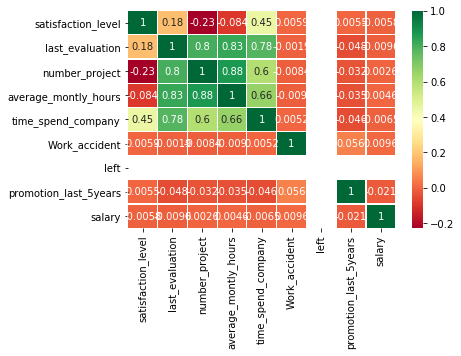

In [35]:
sns.heatmap(all_left.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)

В карте корреляций прослеживается связь между параметрами: last evaluation, number project, average monthly hours, time spend company. 
Наибольшая корреляция между количеством проектов и ежемесячной нагрузкой. Таким образом, фактор высокой загруженности тоже является важным среди уволившихся сотрудников. 

In [43]:
all_left['time_spend_company'].value_counts()

3    1586
4     890
5     833
6     209
2      53
Name: time_spend_company, dtype: int64

Здесь мы видим, чаще всего увольняются сотрудники, проработавшие свыше 3 лет. В особенности от 3 до 5. Выделим эти данные в отдельный датасет, чтобы понять, какие факторы чаще подталкивают сотрудника уволиться после 3 лет работы в компании.

In [47]:
a = all_left[all_left['time_spend_company'] >=3]
all_left35 = a[a['time_spend_company'] <=5]

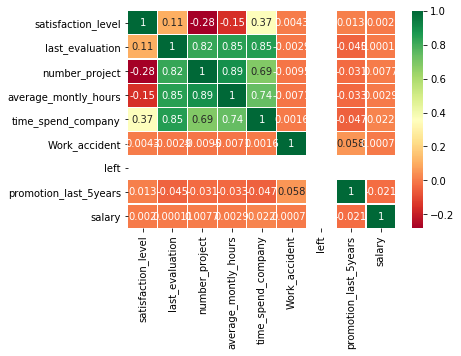

In [48]:
sns.heatmap(all_left35.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)

In [49]:
all_left35['satisfaction_level'].value_counts().head(5)

0.10    358
0.11    335
0.37    194
0.09    193
0.43    177
Name: satisfaction_level, dtype: int64

In [50]:
all_left['salary'].value_counts()

1    2172
2    1317
3      82
Name: salary, dtype: int64

In [56]:
all_left35['promotion_last_5years'].value_counts()

0    3290
1      19
Name: promotion_last_5years, dtype: int64

**Вывод**: Чаще всего увольняются сотрудники со стажем работы от 3 до 5 лет. Уровень их зарплаты преимущественно низкий, при этой нагрузка высокая. Количество повышений относительно небольшое - из 833 сотрудников с 5-летним стажем работы только 19 получили повышение. Соответственно уровень удовлетворенности в такой выборке низкий. Предположу, что основной причиной увольнения становится отсутствие перспиктив роста и развития, что является совокупностью вышеописанных факторов.

In [61]:
all_left['Work_accident'].value_counts()

0    3402
1     169
Name: Work_accident, dtype: int64

In [63]:
df['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

Наличие несчатного случая не является показательным фактором. Среди уволившихся только 4,8% сотрудников имели несчастный случай, среди работающих - 21.4% (2000/9428*100).

**Ниже я попыталась провести статистическую проверку гипотез, но возникли сложности с пониманием этой темы во время лекций. Потому выполнить эту часть задания я не смогла. Надеюсь, что расчёты выше позволяют хоть как-то порассуждать на тему увольнений :)**

Протестируем гипотезу, что увольняются те сотрудники, кто работает более 5 лет, но не получил продвижения

In [17]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [18]:
import researchpy as rp

In [25]:
work5 = df[df['time_spend_company'] >= 5].left
promotion0 = df[df['promotion_last_5years'] == 0].left

In [26]:
descriptives, results = rp.ttest(work5, promotion0)

In [27]:
print(descriptives)
print('_______________________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left   2755.0  0.378221  0.485031  0.009241   0.360102  0.396341
1      left  14680.0  0.241962  0.428286  0.003535   0.235033  0.248891
2  combined  17435.0  0.263493  0.440540  0.003336   0.256953  0.270033
_______________________________________
            Independent t-test     results
0  Difference (left - left) =       0.1363
1        Degrees of freedom =   17433.0000
2                         t =      14.9921
3     Two side test p value =       0.0000
4    Difference < 0 p value =       1.0000
5    Difference > 0 p value =       0.0000
6                 Cohen's d =       0.3113
7                 Hedge's g =       0.3113
8             Glass's delta =       0.2809
9                         r =       0.1128
